In [292]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [293]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [294]:
#first n rows
dataset.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [295]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [296]:
#dataset processing
x=dataset.iloc[:,:12].values

In [297]:
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [298]:
y=dataset.loc[:,'DEATH_EVENT'].values

In [299]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [300]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [301]:
print("shape of x_train",x_train.shape)

shape of x_train (209, 12)


In [302]:
x_train

array([[6.300e+01, 1.000e+00, 5.140e+02, ..., 1.000e+00, 0.000e+00,
        8.300e+01],
       [4.000e+01, 0.000e+00, 4.780e+02, ..., 1.000e+00, 0.000e+00,
        1.480e+02],
       [5.900e+01, 0.000e+00, 6.600e+01, ..., 1.000e+00, 0.000e+00,
        1.350e+02],
       ...,
       [4.200e+01, 0.000e+00, 5.209e+03, ..., 1.000e+00, 1.000e+00,
        8.700e+01],
       [6.300e+01, 1.000e+00, 1.030e+02, ..., 1.000e+00, 1.000e+00,
        2.700e+02],
       [5.000e+01, 1.000e+00, 2.980e+02, ..., 1.000e+00, 1.000e+00,
        2.400e+02]])

In [303]:
print("shape of x_test",x_test.shape)

shape of x_test (90, 12)


In [304]:
x_test

array([[6.50e+01, 0.00e+00, 1.98e+02, ..., 1.00e+00, 1.00e+00, 1.46e+02],
       [5.20e+01, 0.00e+00, 1.32e+02, ..., 1.00e+00, 1.00e+00, 1.12e+02],
       [6.00e+01, 1.00e+00, 9.50e+01, ..., 1.00e+00, 1.00e+00, 1.46e+02],
       ...,
       [6.50e+01, 0.00e+00, 3.26e+02, ..., 0.00e+00, 0.00e+00, 2.20e+02],
       [8.10e+01, 0.00e+00, 4.54e+03, ..., 1.00e+00, 1.00e+00, 1.07e+02],
       [4.50e+01, 0.00e+00, 5.82e+02, ..., 0.00e+00, 0.00e+00, 2.50e+02]])

In [305]:
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of y_train (209,)
shape of y_test (90,)


In [306]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [307]:
#model training/fitting
regressor = LinearRegression()

In [308]:
model = regressor.fit(x_train,y_train)

In [309]:
#prediction
y_pred = model.predict(x_test)

In [310]:
y_pred

array([ 0.28827295,  0.3409485 , -0.00606659,  0.44198298, -0.05048742,
       -0.04847503,  0.26775377,  0.41827215,  0.44066457,  0.51152058,
        0.19633312,  0.84035964, -0.18005137, -0.01314848,  0.58504999,
        0.56021693,  0.06040333,  0.90332824,  0.58947763,  0.4699978 ,
        0.52974757,  0.16745917,  0.32299836,  0.44282726,  0.50738689,
        0.54182226,  0.36083892,  0.22317714,  0.65011472,  0.30297723,
        0.65607696, -0.09405181,  0.54986718,  0.00106572,  0.28268104,
       -0.0716659 , -0.17383476, -0.07549096,  0.20380145,  0.2987428 ,
        0.26943305,  0.38303511,  0.52316421, -0.01261064,  0.32843452,
        0.45243225,  0.35288325, -0.15032006,  0.10568673, -0.22122178,
        0.13237594,  0.88178786,  0.29466155,  0.75376843, -0.21173701,
        0.31738321,  0.19485669,  0.31595682,  0.33417036,  0.26874484,
        0.33838868,  0.61315568,  0.59572513,  0.13082135,  0.24859437,
        0.27474635,  0.14990054,  0.4417092 ,  0.39090189,  0.22

In [311]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [312]:
custom_value = np.array([[30]])
print(model.predict(x_train))

[ 0.6037246   0.18581506  0.5734822   0.89318632  0.43783099  0.44750507
  0.27140246  0.23635536  0.42492216  0.24740867  0.67459609  0.87644187
  0.8663703   0.31005218  0.44742037  0.68053063  0.09658548  0.49637461
 -0.02750029  0.46075383  0.43431849  0.54800376  0.91019263  0.06337912
  0.79227156  0.00729614  0.04641151  0.71441059  0.34277993  0.00880935
  0.65225166  0.74244363  0.16373957  0.09323792  0.28826857 -0.03097634
  0.32331901  0.37322601  0.71242487  0.23871902  0.92727711  0.4919726
  0.08818337  0.13526138  0.37979731  0.14526774  1.09594691  0.48256897
  0.12038719  0.45626228  0.15320902  0.3308275   0.69099857  0.69071224
 -0.20781296  0.34938016  0.39556958  0.68065585 -0.02736921  1.13134131
  0.76924772  0.52631823 -0.06522065 -0.1787811   0.24155084  0.04431255
  0.28045755  0.29282261  0.10610037 -0.01764297  0.52400584  0.00493781
  0.40672225  0.57495031  0.56982062 -0.10196424  0.26013993  0.02279761
  0.62371725  0.39191699  0.583773    0.95680256  0.

In [313]:
#custom_value = np.array([[30]])
print(model.predict(x_test))

[ 0.28827295  0.3409485  -0.00606659  0.44198298 -0.05048742 -0.04847503
  0.26775377  0.41827215  0.44066457  0.51152058  0.19633312  0.84035964
 -0.18005137 -0.01314848  0.58504999  0.56021693  0.06040333  0.90332824
  0.58947763  0.4699978   0.52974757  0.16745917  0.32299836  0.44282726
  0.50738689  0.54182226  0.36083892  0.22317714  0.65011472  0.30297723
  0.65607696 -0.09405181  0.54986718  0.00106572  0.28268104 -0.0716659
 -0.17383476 -0.07549096  0.20380145  0.2987428   0.26943305  0.38303511
  0.52316421 -0.01261064  0.32843452  0.45243225  0.35288325 -0.15032006
  0.10568673 -0.22122178  0.13237594  0.88178786  0.29466155  0.75376843
 -0.21173701  0.31738321  0.19485669  0.31595682  0.33417036  0.26874484
  0.33838868  0.61315568  0.59572513  0.13082135  0.24859437  0.27474635
  0.14990054  0.4417092   0.39090189  0.22211789  0.34732551  0.57934711
  0.08206461  0.73371871  0.20802262 -0.02524214  0.73894119  0.67549797
 -0.07440676  0.27707632  0.0999944   0.88199759  0.

In [314]:
from sklearn.metrics import accuracy_score


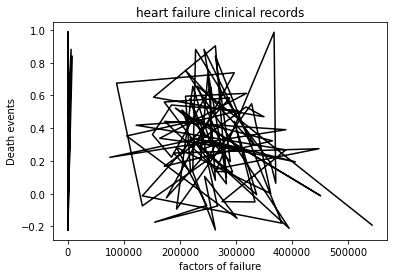

In [315]:
#plotting
plt.title("heart failure clinical records")
plt.xlabel("factors of failure")
plt.ylabel("Death events")
#plt.plot(x_test, y_test, color ='b')
plt.plot(x_test, model.predict(x_test), color ='k')
plt.show()


In [316]:
model = LogisticRegression()

In [317]:
model.fit(x,y)

LogisticRegression()

In [318]:
model.classes_

array([0, 1], dtype=int64)

In [319]:
model.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [320]:
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [321]:
print(type(x_train))

<class 'numpy.ndarray'>


In [322]:
print(type(y_train))

<class 'numpy.ndarray'>


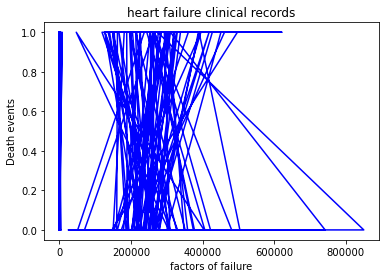

In [323]:
#plotting
plt.title("heart failure clinical records")
plt.xlabel("factors of failure")
plt.ylabel("Death events")
plt.plot(x_train, model.predict(x_train), color = "blue")
plt.show()

In [324]:
model.score(x_test,y_test)

0.8444444444444444

In [325]:
model.predict_proba(x)

array([[0.03993593, 0.96006407],
       [0.09354062, 0.90645938],
       [0.06660551, 0.93339449],
       [0.13088984, 0.86911016],
       [0.08788516, 0.91211484],
       [0.07971065, 0.92028935],
       [0.02774565, 0.97225435],
       [0.67896998, 0.32103002],
       [0.64568654, 0.35431346],
       [0.10796007, 0.89203993],
       [0.16590046, 0.83409954],
       [0.11108102, 0.88891898],
       [0.24908964, 0.75091036],
       [0.38056698, 0.61943302],
       [0.31089828, 0.68910172],
       [0.18051571, 0.81948429],
       [0.08893601, 0.91106399],
       [0.12242326, 0.87757674],
       [0.08446964, 0.91553036],
       [0.67134378, 0.32865622],
       [0.11597534, 0.88402466],
       [0.16985626, 0.83014374],
       [0.19122196, 0.80877804],
       [0.77882316, 0.22117684],
       [0.10546694, 0.89453306],
       [0.12330033, 0.87669967],
       [0.07991552, 0.92008448],
       [0.33569545, 0.66430455],
       [0.32820393, 0.67179607],
       [0.08417426, 0.91582574],
       [0.

In [326]:
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])